# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 6.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
323185,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0513,0.0757,0.0024,0.0757,0,0,0,0
340840,0.0024,0.0024,0.0024,0.0024,0.0024,0.0854,0.0757,0.4956,0.0488,0.0439,7,7,11,11
134266,0.0024,0.8521,0.2124,0.0977,0.0732,0.2612,1.9629,0.5884,0.2515,1.7432,10,10,4,4
334218,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.1807,0.0952,0.0024,0.0024,0,0,0,0
421715,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.0903,0.2197,0.0024,0.0415,10,0,20,0


In [3]:
raw_data.shape

(453169, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453169 entries, 0 to 453168
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          453169 non-null  float64
 1   Emg2          453169 non-null  float64
 2   Emg3          453169 non-null  float64
 3   Emg4          453169 non-null  float64
 4   Emg5          453169 non-null  float64
 5   Emg6          453169 non-null  float64
 6   Emg7          453169 non-null  float64
 7   Emg8          453169 non-null  float64
 8   Emg9          453169 non-null  float64
 9   Emg10         453169 non-null  float64
 10  repetition    453169 non-null  int64  
 11  rerepetition  453169 non-null  int64  
 12  stimulus      453169 non-null  int64  
 13  restimulus    453169 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000
mean,0.005103,0.148389,0.138062,0.102310,0.048998,0.165430,0.587269,0.442196,0.203062,0.301173,3.266322,2.535246,5.786462,4.617968
std,0.010483,0.261329,0.298778,0.247929,0.108016,0.347019,0.805044,0.669024,0.474586,0.421003,3.489826,3.359291,6.599539,6.446301
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.007300,0.063500,0.092800,0.002400,0.041500,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.009800,0.004900,0.002400,0.002400,0.056200,0.322300,0.217300,0.004900,0.148900,2.000000,0.000000,3.000000,0.000000
75%,0.004900,0.192900,0.139200,0.092800,0.048800,0.170900,0.759300,0.468800,0.166000,0.385700,6.000000,5.000000,11.000000,9.000000
max,0.903300,2.976100,4.660600,4.099100,2.482900,4.668000,4.665500,4.668000,4.663100,4.421400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     184003
8      16361
2      15525
7      15517
12     15513
4      15507
6      15497
9      15476
11     15470
5      15468
10     15443
1      15443
3      15441
14     10342
17     10337
13     10336
15     10295
16     10261
21      5173
18      5171
19      5171
23      5144
20      5138
22      5137
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

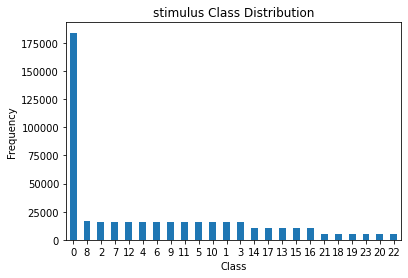

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
23286,0.0024,0.0439,0.0073,0.0073,0.0024,0.0586,0.8008,0.3467,0.1172,0.6006,8,8,3,3
266772,0.0610,0.0684,0.0024,0.0244,0.0024,0.0220,0.1831,0.6201,0.0024,0.0220,0,0,0,0
21092,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.6616,0.2246,0.0024,0.2417,0,0,0,0
206158,0.0024,0.0024,0.0024,0.0024,0.0024,0.0244,0.0317,0.1196,0.0024,0.0391,0,0,0,0
156297,0.0024,0.6421,0.3198,0.0806,0.0024,0.0562,0.7251,0.2222,0.4077,0.6519,6,6,7,7


In [12]:
raw_data.shape

(378096, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378096 entries, 0 to 453168
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378096 non-null  float64
 1   Emg2          378096 non-null  float64
 2   Emg3          378096 non-null  float64
 3   Emg4          378096 non-null  float64
 4   Emg5          378096 non-null  float64
 5   Emg6          378096 non-null  float64
 6   Emg7          378096 non-null  float64
 7   Emg8          378096 non-null  float64
 8   Emg9          378096 non-null  float64
 9   Emg10         378096 non-null  float64
 10  repetition    378096 non-null  int64  
 11  rerepetition  378096 non-null  int64  
 12  stimulus      378096 non-null  int64  
 13  restimulus    378096 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# XGBoost

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[04:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [18]:
y_pred = xgb.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 87.59984131182227


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     35440
           1       0.89      0.87      0.88      2416
           2       0.91      0.79      0.85      2012
           3       0.88      0.82      0.85      2302
           4       0.94      0.84      0.88      2120
           5       0.90      0.81      0.85      2055
           6       0.92      0.84      0.88      2214
           7       0.81      0.80      0.81      2326
           8       0.80      0.73      0.76      2403
           9       0.84      0.72      0.78      2255
          10       0.84      0.69      0.76      2516
          11       0.88      0.76      0.82      2458
          12       0.78      0.70      0.73      2411
          13       0.86      0.79      0.82      1404
          14       0.68      0.63      0.66      1637
          15       0.80      0.76      0.78      1448
          16       0.85      0.78      0.81      1536
 

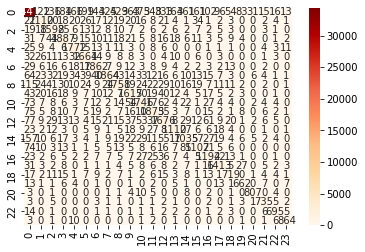

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

https://analyticsindiamag.com/7-types-classification-algorithms/

https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier

https://www.kaggle.com/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85

# Evaluation

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9597857709600635
MSE: 10.474887595874108
RMSE: 3.2364931014717317


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.8747269378590657
Recall Score :  0.8759984131182227
f1_score :  0.8733713382731482
